In [24]:
import pandas as pd
import string
import seaborn as sb
from nltk.corpus import stopwords

In [25]:
df=pd.read_csv('yelp.csv')

In [26]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [27]:
df.drop(['business_id','date','review_id','user_id'],axis=1,inplace=True)

In [28]:
df.type.nunique()

1

In [29]:
df.drop('type',axis=1,inplace=True)

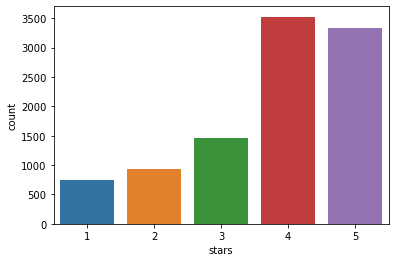

In [6]:
sb.countplot(df['stars'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016ECE58EEB8>,
      dtype=object)

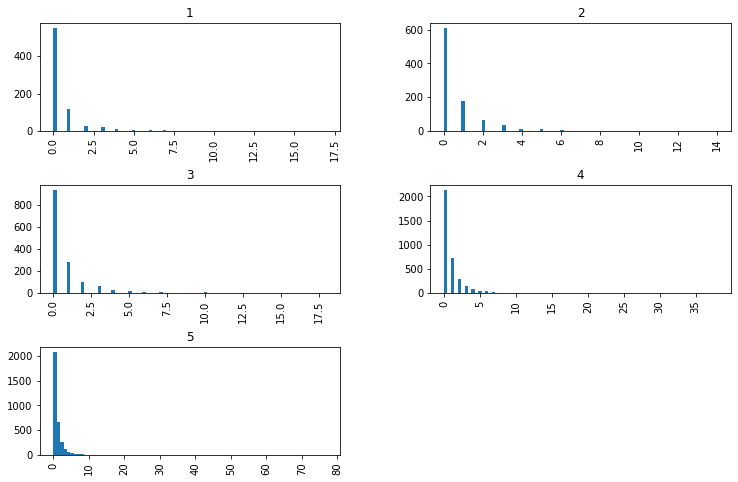

In [13]:
df.hist(column='cool',by='stars',bins=80,figsize=(12,8))

In [30]:
df['length']=df['text'].apply(len)

In [31]:
df.head()

,stars,text,cool,useful,funny,length
0,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,5,I have no idea why some people give bad review...,0,0,0,1345
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016ECA990240>,
      dtype=object)

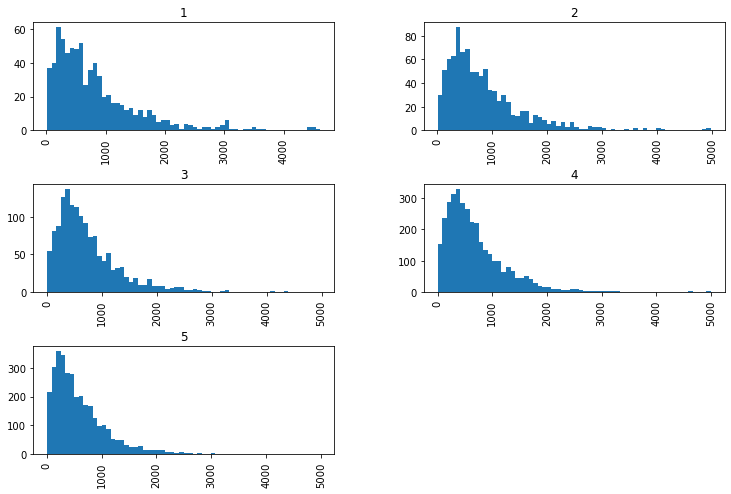

In [17]:
df.hist(column='length',by='stars',bins=60,figsize=(12,8))

In [20]:
df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [24]:
x=text_process(df['text'][0])

In [32]:
from  sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [40]:
df=df[(df.stars==1) | (df.stars==5)]

In [41]:
bow=CountVectorizer().fit(df['text'])

In [42]:
bow_msg=bow.transform(df['text'])

In [47]:
bow_tfdif=TfidfTransformer().fit(bow_msg)

In [48]:
msg_tfidf=bow_tfdif.transform(bow_msg)

In [49]:
from sklearn.model_selection import train_test_split

In [53]:
 X_train, X_test, y_train, y_test = train_test_split(bow_msg, df['stars'], test_size=0.2, random_state=101)

In [54]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
model.score(X_test,y_test)

0.9339853300733496